In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("wbc.csv")
import numpy as np
dataset = dataset.replace('?',np.nan)
dataset['bare_nuclei'] = pd.to_numeric(dataset.bare_nuclei.fillna
                                  (dataset.bare_nuclei.median()))

In [3]:
X = dataset.drop([dataset.columns[-1]], axis=1)
y = dataset.jenis

In [9]:
seed = 42

In [10]:
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [12]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [13]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [14]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.67%


In [15]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[150,   4],
       [  6,  71]])

In [16]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [17]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9567
Precision: 0.9467
Recall: 0.9221
F1: 0.9342


In [18]:
params_grid = {
    'max_depth': [1,3, 5, 7],
    'n_estimators': [50,100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]
    
}

In [19]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [20]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
cv = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=seed)

In [22]:
bst_grid = GridSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_grid=params_grid,
    cv=cv,
    scoring='accuracy'
)

In [23]:
bst_grid.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[2 2 ..., 4 4], n_folds=10, shuffle=True, random_state=42),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7], 'n_estimators': [50, 100], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [24]:
bst_grid.grid_scores_

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.90844, std: 0.03746, params: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.90844, std: 0.03746, params: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100},
 mean: 0.93991, std: 0.03602, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50},
 mean: 0.94278, std: 0.03670, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100},
 mean: 0.94278, std: 0.02928, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50},
 mean: 0.94278, std: 0.02928, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.94278, std: 0.02928, params: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50},
 mean: 0.94278, std: 0.02928, params: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100},
 mean: 0.94850, std: 0.03392, params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.94707, std: 0.03135, params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100

In [25]:
print("Best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters:")
for key, value in bst_grid.best_params_.items():
    print("\t{}: {}".format(key, value))


Best accuracy obtained: 0.9628040057224606
Parameters:
	learning_rate: 0.1
	max_depth: 1
	n_estimators: 50


In [26]:
bst_grid.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [27]:
model2=XGBClassifier (base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [28]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [29]:
y_pred2 = model2.predict(X_test)
predictions = [round(value) for value in y_pred2]

In [30]:
accuracy = accuracy_score(y_test, predictions)

In [31]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred2)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9654
Precision: 0.9481
Recall: 0.9481
F1: 0.9481


In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[150,   4],
       [  6,  71]])

In [33]:
params_grid2 = {
    'min_child_weight': [6,8,10,12],
    'subsample': [0.2,0.4,0.8,1],
    'reg_alpha': [10e-5, 10e-2, 0.1, 1, 100]
    
}

In [34]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [35]:
bst_grid2 = GridSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_grid=params_grid2,
    cv=cv,
    scoring='accuracy'
)

In [36]:
bst_grid2.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[2 2 ..., 4 4], n_folds=10, shuffle=True, random_state=42),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [6, 8, 10, 12], 'subsample': [0.2, 0.4, 0.8, 1], 'reg_alpha': [0.0001, 0.1, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [37]:
bst_grid2.grid_scores_

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96137, std: 0.02219, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.2},
 mean: 0.96423, std: 0.02417, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.4},
 mean: 0.96567, std: 0.02328, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.8},
 mean: 0.96423, std: 0.02420, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 1},
 mean: 0.95708, std: 0.02479, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.2},
 mean: 0.96280, std: 0.02326, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.4},
 mean: 0.96710, std: 0.02312, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.8},
 mean: 0.96280, std: 0.02415, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 1},
 mean: 0.95708, std: 0.02479, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.2},
 mean: 0.96280, std: 0.02326, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.4},
 m

In [38]:
print("Best accuracy obtained: {0}".format(bst_grid2.best_score_))
print("Parameters:")
for key, value in bst_grid2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best accuracy obtained: 0.9685264663805436
Parameters:
	min_child_weight: 8
	reg_alpha: 1
	subsample: 0.8


In [39]:
bst_grid2.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [40]:
model3=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [41]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [42]:
y_pred3 = model3.predict(X_test)
predictions = [round(value) for value in y_pred3]

# tidak lebih baik dari model2

In [43]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred3)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9654
Precision: 0.9600
Recall: 0.9351
F1: 0.9474


In [44]:
metrics.confusion_matrix(y_test, y_pred)

array([[150,   4],
       [  6,  71]])

In [45]:
import matplotlib.pyplot as plt

In [46]:
print (model.feature_importances_)

[ 0.18087319  0.0997921   0.09355509  0.16839917  0.08108108  0.17047817
  0.09147609  0.0956341   0.01871102]


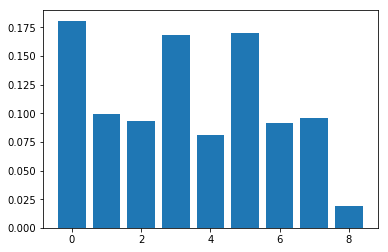

In [47]:
plt.bar(range(len(model.feature_importances_)),model.feature_importances_)
plt.show()

In [48]:
import xgboost as xgb

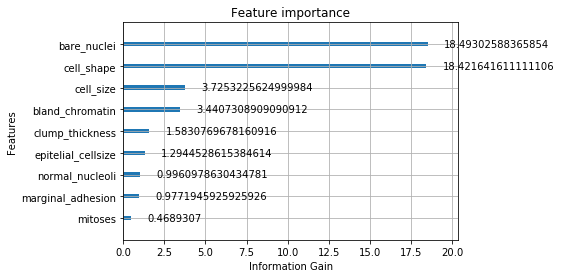

In [49]:
xgb.plot_importance(model,importance_type='gain',xlabel='Information Gain')
plt.show()

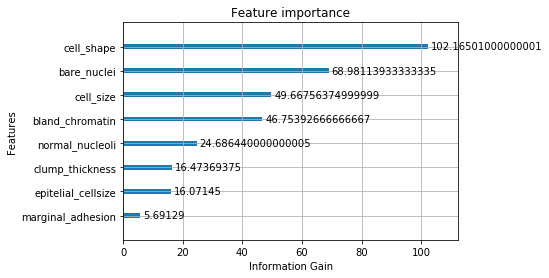

In [50]:
xgb.plot_importance(model2,importance_type='gain',xlabel='Information Gain')
plt.show()

In [51]:
model4=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=8, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [52]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=1,
       min_child_weight=8, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [53]:
y_pred4 = model4.predict(X_test)
predictions = [round(value) for value in y_pred4]

In [54]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred4)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9654
Precision: 0.9481
Recall: 0.9481
F1: 0.9481
